c:\Users\pauls\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\pauls\AppData\Local\Temp\ipykernel_15384\2720130721.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_freq, y="bigram", x="count", palette="Reds_r")
C:\Users\pauls\AppData\Local\Temp\ipykernel_15384\2720130721.py:56: UserWarning: Glyph 129532 (\N{BAR OF SOAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pauls\AppData\Roaming\Python\Python312\site-packages\IPyth

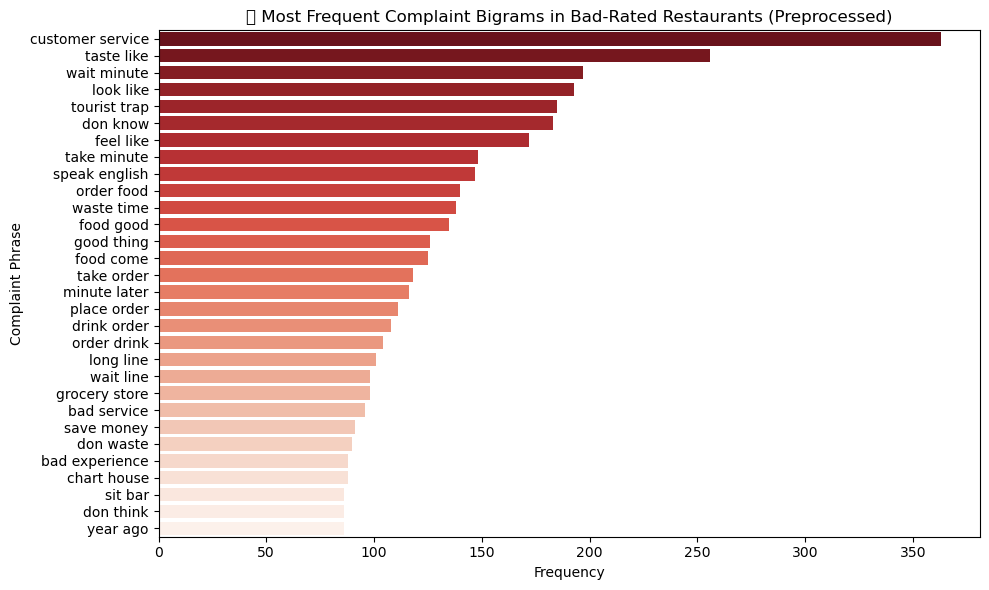

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import re

# Load spaCy English model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Load dataset
df = pd.read_csv("data/yelp_philadelphia.csv")  # Update path if needed
df = df.dropna(subset=["business_id", "business_stars", "text"])

# Compute average star rating per business
business_avg = df.groupby("business_id")["business_stars"].mean().reset_index()
business_avg.columns = ["business_id", "avg_stars"]
df = df.merge(business_avg, on="business_id", how="left")

# Filter both by business rating and review rating
bad_reviews = df[(df["avg_stars"] <= 2.5) & (df["review_stars"] <= 2.5)].copy()

# Optional brand/location words to remove
brand_words = set([
    "tony", "luke", "geno", "pat", "south", "philly", "philadelphia", "street", "city",
    "cheesesteak", "cheese", "steak", "restaurant", "center"
])

# Preprocessing function
def clean_and_lemmatize(text):
    text = re.sub(r"[^a-zA-Z\s]", " ", text.lower())  # Remove punctuation and lowercase
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop and token.lemma_ not in brand_words and len(token) > 2
    ]
    return " ".join(tokens)

# Apply preprocessing
bad_reviews["clean_text"] = bad_reviews["text"].apply(clean_and_lemmatize)

# Extract most common bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=30)
X = vectorizer.fit_transform(bad_reviews["clean_text"])
bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
bigram_freq = pd.DataFrame({"bigram": bigrams, "count": counts})
bigram_freq = bigram_freq.sort_values(by="count", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bigram_freq, y="bigram", x="count", palette="Reds_r")
plt.title("🧼 Most Frequent Complaint Bigrams in Bad-Rated Restaurants (Preprocessed)")
plt.xlabel("Frequency")
plt.ylabel("Complaint Phrase")
plt.tight_layout()
plt.show()


c:\Users\pauls\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\pauls\AppData\Local\Temp\ipykernel_15384\4166389886.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trigram_freq, y="trigram", x="count", palette="Reds_r")
C:\Users\pauls\AppData\Local\Temp\ipykernel_15384\4166389886.py:56: UserWarning: Glyph 129532 (\N{BAR OF SOAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pauls\AppData\Roaming\Python\Python312\site-packages\IPy

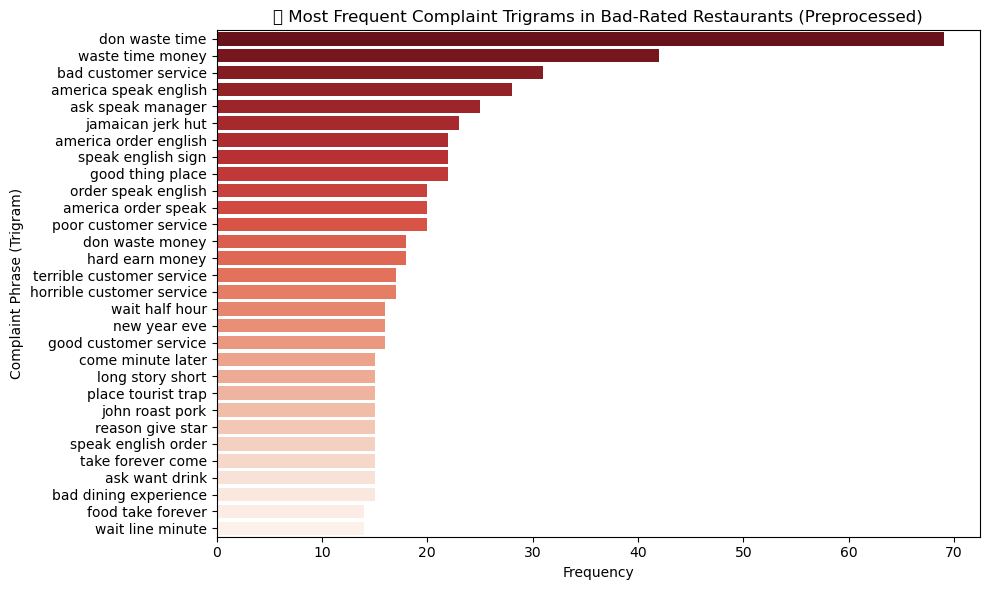

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import re

# Load spaCy English model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Load dataset
df = pd.read_csv("data/yelp_philadelphia.csv")  # Update path if needed
df = df.dropna(subset=["business_id", "business_stars", "review_stars", "text"])

# Compute average star rating per business
business_avg = df.groupby("business_id")["business_stars"].mean().reset_index()
business_avg.columns = ["business_id", "avg_stars"]
df = df.merge(business_avg, on="business_id", how="left")

# Filter both by business rating and review rating
bad_reviews = df[(df["avg_stars"] <= 2.5) & (df["review_stars"] <= 2.5)].copy()

# Optional brand/location words to remove
brand_words = set([
    "tony", "luke", "geno", "pat", "south", "philly", "philadelphia", "street", "city",
    "cheesesteak", "cheese", "steak", "restaurant", "center"
])

# Preprocessing function
def clean_and_lemmatize(text):
    text = re.sub(r"[^a-zA-Z\s]", " ", text.lower())  # Remove punctuation and lowercase
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop and token.lemma_ not in brand_words and len(token) > 2
    ]
    return " ".join(tokens)

# Apply preprocessing
bad_reviews["clean_text"] = bad_reviews["text"].apply(clean_and_lemmatize)

# Extract most common trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=30)
X = vectorizer.fit_transform(bad_reviews["clean_text"])
trigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
trigram_freq = pd.DataFrame({"trigram": trigrams, "count": counts})
trigram_freq = trigram_freq.sort_values(by="count", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=trigram_freq, y="trigram", x="count", palette="Reds_r")
plt.title("🧼 Most Frequent Complaint Trigrams in Bad-Rated Restaurants (Preprocessed)")
plt.xlabel("Frequency")
plt.ylabel("Complaint Phrase (Trigram)")
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

# Load dataset
df = pd.read_csv("data/yelp_philadelphia.csv")  # Update this path
df = df.dropna(subset=["business_id", "business_stars", "text"])

# Compute average star rating per business
business_avg = df.groupby("business_id")["business_stars"].mean().reset_index()
business_avg.columns = ["business_id", "avg_stars"]
df = df.merge(business_avg, on="business_id", how="left")

# Filter both by business rating and review rating
bad_reviews = df[(df["avg_stars"] <= 2.5) & (df["review_stars"] <= 2.5)].copy()

# Basic cleaning
def simple_clean(text):
    text = re.sub(r"[^a-zA-Z\s]", " ", text.lower())  # Lowercase and remove punctuation
    return text

bad_reviews["clean_text"] = bad_reviews["text"].apply(simple_clean)

# Vectorize text (no spaCy)
vectorizer = CountVectorizer(stop_words="english", max_df=0.9, min_df=10)
doc_term_matrix = vectorizer.fit_transform(bad_reviews["clean_text"])

# Fit LDA
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(doc_term_matrix)

# Show top words for each topic
def print_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\n🔹 Topic {idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, vectorizer.get_feature_names_out())



🔹 Topic 1:
place | just | like | people | service | time | drinks | food | said | told

🔹 Topic 2:
cheese | cheesesteak | geno | philly | steak | place | pat | better | meat | like

🔹 Topic 3:
food | order | ordered | service | good | minutes | time | came | just | got

🔹 Topic 4:
food | service | bar | place | airport | just | good | beer | waitress | drink
